Using transport data to calculate spatial weights


In [1]:
import csv
import pandas as pd
from utils import get_nodes_with_regions_df
import networkx as nx
import pickle
import matplotlib.pyplot as plt


c:\Users\Johan\Anaconda3\envs\gds_py\lib\site-packages\osmnx\projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [5]:
nodes_with_regions_df = get_nodes_with_regions_df(shapefile="landsdel/landsdel.shp")
# nodes_with_regions_df = nodes_with_regions_df.dropna(subset=["kommunekod"]) # remove nan stations
# nodes_with_regions_df["kommunekod"].unique()
# nodes_with_regions_df.head()
nodes_with_regions_df = nodes_with_regions_df.dropna(subset=["navn"]) # remove nan stations
nodes_with_regions_df["navn"].unique()



c:\Users\Johan\Anaconda3\envs\gds_py\lib\site-packages\IPython\core\interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


array(['Københavns omegn', 'Byen København', 'Nordsjælland',
       'Østsjælland', 'Vest- og Sydsjælland', 'Nordjylland', 'Østjylland',
       'Sydjylland', 'Vestjylland', 'Fyn', 'Bornholm'], dtype=object)

In [43]:
nodes_with_regions_df["node_id"] = nodes_with_regions_df["node_id"].astype(int)
nodes_with_regions_df.head()

,node_id,longitude,latitude,modes,geometry,index_right,objectid,id_lokalid,id_namespa,status,...,dataspecif,landekode,skala,kommunekod,lau1vaerdi,udenforkom,regionskod,regionslok,udtraeksda,gmlid
0,2,12.498018,55.767248,[3],POINT (719423.000 6185716.000),22.0,1256675,389115,http://data.gov.dk/dagi,vedtaget,...,DAGI Objektspecifikation version 2.0,DK,1:10.000,0173,173,f,1084,389099,2020-04-20,dagi.389115
1,3,12.496648,55.764419,[3],POINT (719353.000 6185397.000),22.0,1256675,389115,http://data.gov.dk/dagi,vedtaget,...,DAGI Objektspecifikation version 2.0,DK,1:10.000,0173,173,f,1084,389099,2020-04-20,dagi.389115
2,6,12.494925,55.756223,[700],POINT (719291.000 6184480.000),27.0,1255981,389109,http://data.gov.dk/dagi,vedtaget,...,DAGI Objektspecifikation version 2.0,DK,1:10.000,0159,159,f,1084,389099,2020-04-20,dagi.389109
3,8,12.495169,55.749868,[700],POINT (719342.000 6183774.000),27.0,1255981,389109,http://data.gov.dk/dagi,vedtaget,...,DAGI Objektspecifikation version 2.0,DK,1:10.000,0159,159,f,1084,389099,2020-04-20,dagi.389109
4,9,12.494961,55.747366,"[3, 700]",POINT (719343.000 6183495.000),27.0,1255981,389109,http://data.gov.dk/dagi,vedtaget,...,DAGI Objektspecifikation version 2.0,DK,1:10.000,0159,159,f,1084,389099,2020-04-20,dagi.389109


In [6]:
data=pd.read_csv('data\jan_2019.csv', encoding="latin-1")
data.head()
# StartStopPointNr	SlutStopPointNr	SUM_of_Personrejser
graph = nx.Graph()
excepts = 0
area_name = "navn" # "kommunekod"
for index,row in data.iterrows():
    try:
        start = row['StartStopPointNr']
        start_location = nodes_with_regions_df[nodes_with_regions_df["node_id"]==start][area_name].values[0]
        end = row['SlutStopPointNr']
        end_location = nodes_with_regions_df[nodes_with_regions_df["node_id"]==end][area_name].values[0]
        weight = row['SUM_of_Personrejser']
        if start_location != end_location:
            if graph.has_edge(start_location,end_location):
                graph[start_location][end_location]['weight'] += weight
            else:
                graph.add_edge(start_location,end_location,weight=weight)
    except:
        excepts += 1
        pass
print(excepts)

    


196291


In [7]:
import pickle
with open('storkreds_passenger_exchange', 'wb') as f:
    pickle.dump(graph, f, pickle.HIGHEST_PROTOCOL)

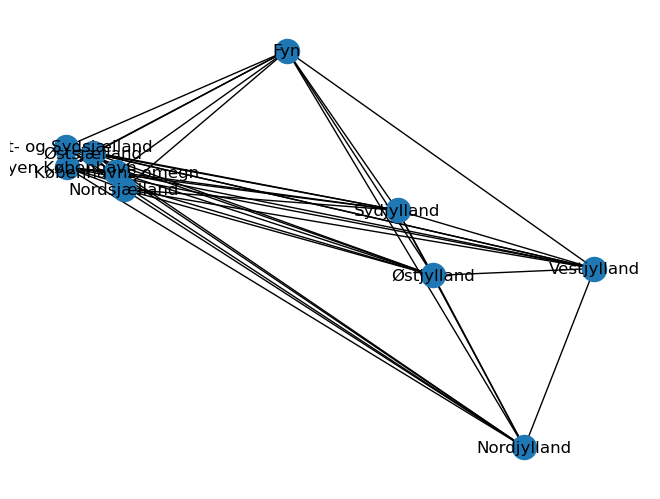

In [8]:
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True)
plt.show()

In [9]:
adj_matrix = nx.adjacency_matrix(graph)

# Convert the adjacency matrix to a NumPy array
adj_array = adj_matrix.toarray()

# Print the adjacency matrix
print(adj_array)

[[0.00000000e+00 1.49030433e+06 2.13604000e+05 9.94460000e+04
  4.31610000e+04 4.38300000e+03 1.90600000e+03 1.82500000e+03
  4.56000000e+02 2.75000000e+02]
 [1.49030433e+06 0.00000000e+00 5.01146000e+05 2.20707584e+05
  1.53648000e+05 1.94030000e+04 7.09500000e+03 8.15900000e+03
  1.41000000e+03 1.05000000e+03]
 [2.13604000e+05 5.01146000e+05 0.00000000e+00 1.89960000e+04
  8.37700000e+03 1.59700000e+03 6.80000000e+02 5.78000000e+02
  1.73000000e+02 1.32000000e+02]
 [9.94460000e+04 2.20707584e+05 1.89960000e+04 0.00000000e+00
  9.13420000e+04 2.74900000e+03 9.54000000e+02 7.32000000e+02
  1.34000000e+02 1.92000000e+02]
 [4.31610000e+04 1.53648000e+05 8.37700000e+03 9.13420000e+04
  0.00000000e+00 7.51600000e+03 2.21800000e+03 1.54600000e+03
  4.11000000e+02 5.58000000e+02]
 [4.38300000e+03 1.94030000e+04 1.59700000e+03 2.74900000e+03
  7.51600000e+03 0.00000000e+00 2.01440000e+04 6.71500000e+03
  1.00300000e+03 1.15600000e+03]
 [1.90600000e+03 7.09500000e+03 6.80000000e+02 9.54000000e

In [10]:
adj_array.shape

(10, 10)